In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from scipy.stats import mode
color = sns.color_palette()
pd.options.display.max_columns = None

In [2]:
%%time
path_to_csv = '/project/data/preprocessed.csv'
data = pd.read_csv(path_to_csv)
data = data.fillna(0)
print(data.values.shape)
data = data[data['year'] == 2018] # utc shifts sometime

(13739433, 26)
CPU times: user 1min 28s, sys: 11.7 s, total: 1min 39s
Wall time: 1min 39s


In [3]:
data.head()

ClientId      BetId  BetType  BetState  PartnerId               BetCreated  \
0   3482906  137841559        1         3        158  2018-01-01 00:24:21.122   
1  29058679  137845863        1         3        158  2018-01-01 01:02:14.196   
2   3462947  137857685        1         3        158  2018-01-01 03:32:56.803   
3   3096231  137874333        1         3        158  2018-01-01 07:22:53.019   
4  29125784  137874417        1         3        158  2018-01-01 07:23:31.961   

   BetAmountInEURC  BetWinningAmountInEURC BetCurrencyId  ClientBirthRegionId  \
0             5137                       0           TRY                    0   
1               34                       0           TRY                    0   
2              538                       0           TRY                    0   
3             1324                       0           TRY                    0   
4              214                       0           TRY                    0   

   BetSource  BetIsLive  SportId   PartnerName  PartnerTimeZone  \
0          4          1        3  Grandbetting                3   
1          4          1        1  Grandbetting                3   
2         42          1        4  Grandbetting                3   
3          4          1       41  Grandbetting                3   
4         16          0        1  Grandbetting                3   

   ClientRegionName BetCreated_PartnerTimezone  day  day_week  week  month  \
0               0.0    2018-01-01 03:24:21.122    1         0     1      1   
1               0.0    2018-01-01 04:02:14.196    1         0     1      1   
2               0.0    2018-01-01 06:32:56.803    1         0     1      1   
3               0.0    2018-01-01 10:22:53.019    1         0     1      1   
4               0.0    2018-01-01 10:23:31.961    1         0     1      1   

   year  hour  AmountInEUR  WinningAmountInEUR BetTypeName  
0  2018     3        51.37                 0.0      Single  
1  2018     4         0.34                 0.0      Single  
2  2018     6         5.38                 0.0      Single  
3  2018    10        13.24                 0.0      Single  
4  2018    10         2.14                 0.0      Single

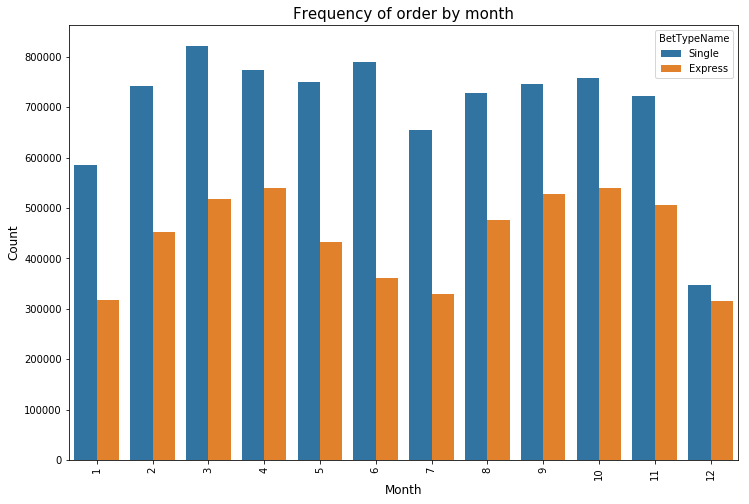

In [4]:
plt.figure(figsize=(12,8))
sns.countplot(x="month", data=data, hue='BetTypeName')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by month", fontsize=15)
plt.show()

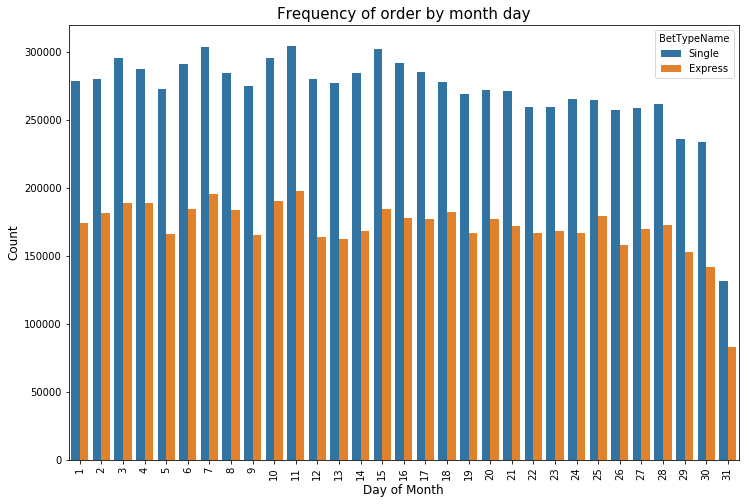

In [5]:
plt.figure(figsize=(12,8))
sns.countplot(x="day", data=data, hue='BetTypeName')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by month day", fontsize=15)
plt.show()

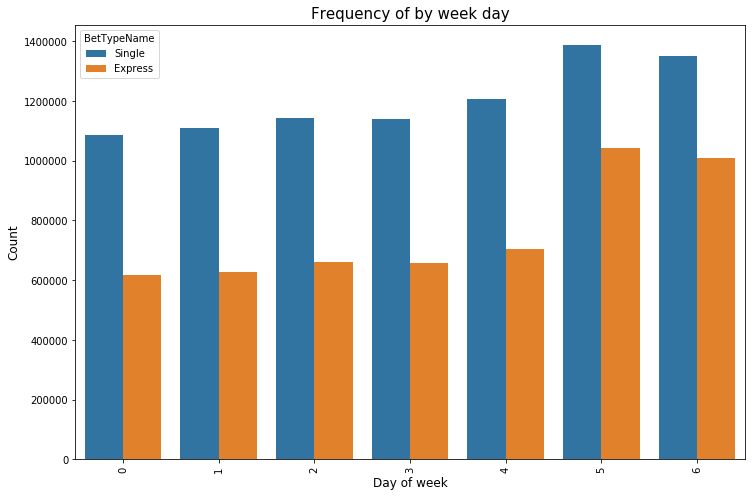

In [6]:
plt.figure(figsize=(12,8))
sns.countplot(x="day_week", data=data, hue='BetTypeName')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of by week day", fontsize=15)
plt.show()

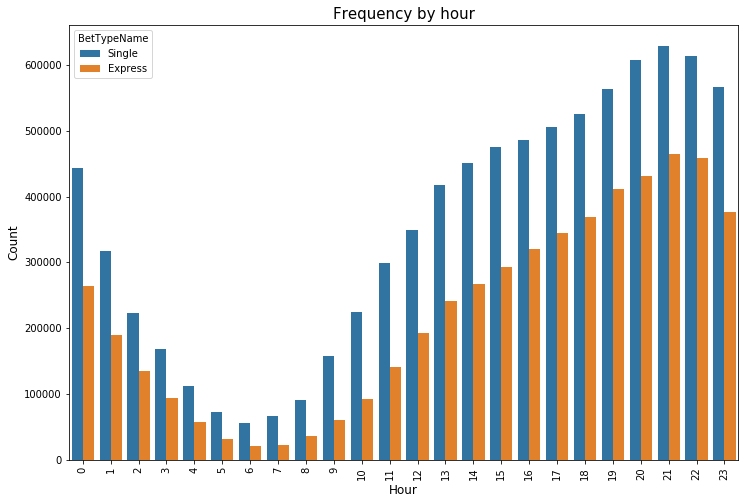

In [7]:
plt.figure(figsize=(12,8))
sns.countplot(x="hour", data=data, hue='BetTypeName')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency by hour", fontsize=15)
plt.show()

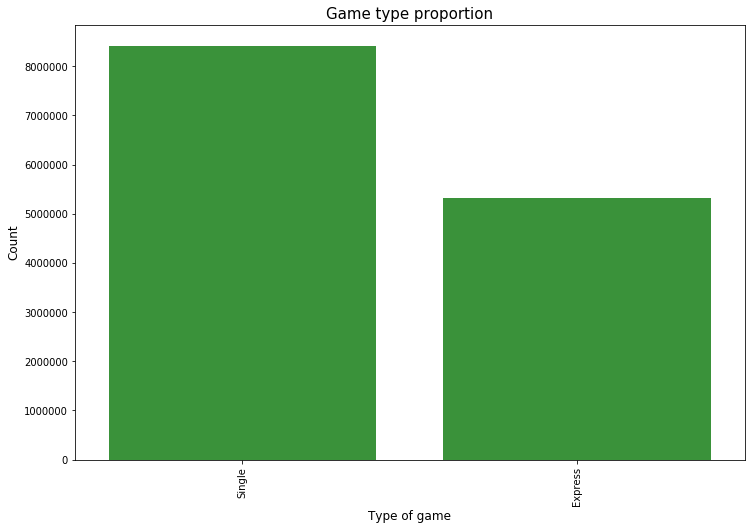

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x="BetTypeName", data=data, color=color[2])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Type of game', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Game type proportion", fontsize=15)
plt.show()

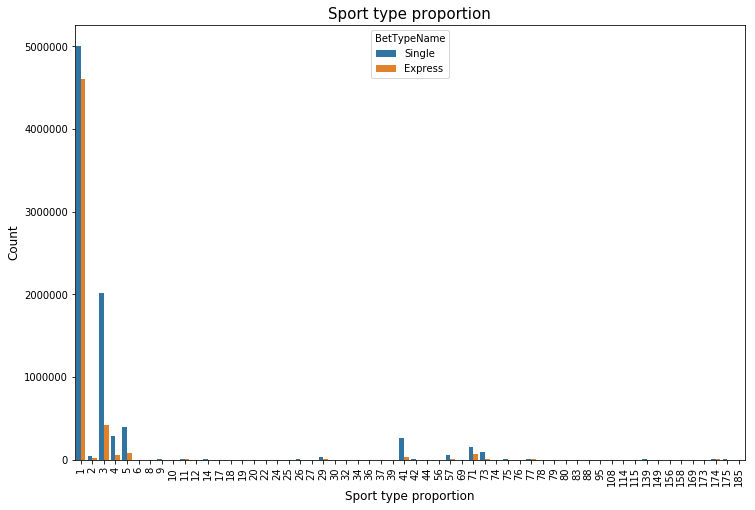

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(x="SportId", data=data, hue='BetTypeName')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Sport type proportion', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Sport type proportion", fontsize=15)
plt.show()

In [10]:
non_football = data[data['SportId'] != 1]
# on_football = data
distribution = non_football.groupby('SportId')['BetId'].count().reset_index()
# print(distribution)
distribution.columns = ['sport', 'count']
distribution = distribution.sort_values(by='count', ascending=False)
cut_off = np.mean(distribution['count'].values)
print('cut_off {}'.format(cut_off))
distribution = distribution[distribution['count'] >= cut_off]
non_football = non_football[non_football['SportId'].isin(distribution['sport'].tolist())]
football = data[data['SportId'] == 1]
distribution.head()



cut_off 72476.22807017544


sport    count
1       3  2440420
3       5   474609
2       4   342639
27     41   297675
33     71   214080

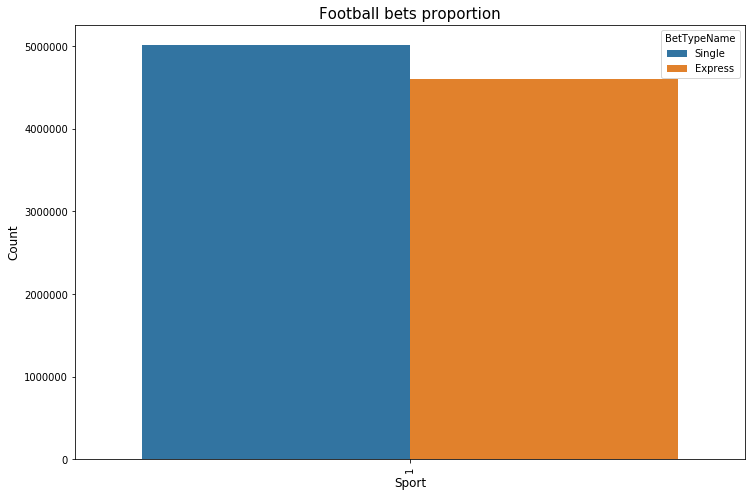

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x="SportId", data=football, hue='BetTypeName')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Sport', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Football bets proportion", fontsize=15)
plt.show()

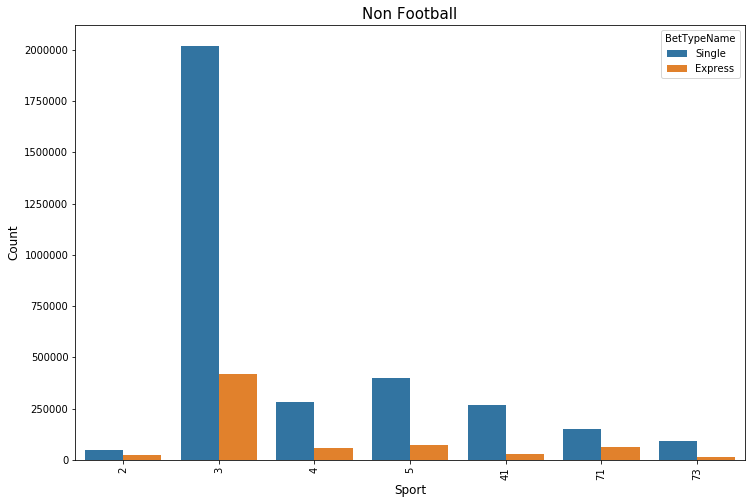

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x="SportId", data=non_football, hue='BetTypeName')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Sport', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Non Football", fontsize=15)
plt.show()